In [1]:
#libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA
register_matplotlib_converters()
from time import time


In [2]:
#Define parser function for date
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')



In [3]:
#Reading the data
df = pd.read_csv('./Data-CSVfiles/ice_cream.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

In [4]:
#infer the frequency of the data
df = df.asfreq(pd.infer_freq(df.index))


In [5]:
#Start date and end date
start_date = datetime(2010,1,1)
end_date = datetime(2020,1,1)
df = df[start_date:end_date]


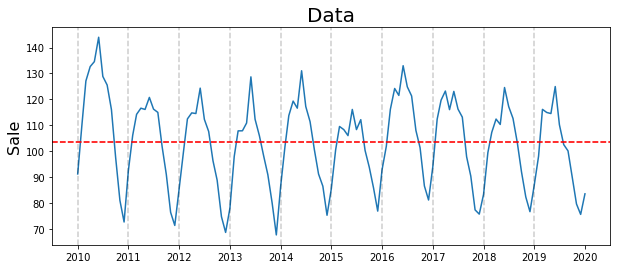

In [6]:
#Plot of data
plt.figure(figsize=(10,4))
plt.plot(df)
plt.title('Data', fontsize=20)
plt.ylabel('Sale', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
    plt.axhline(df.mean(), color='r', alpha=0.2, linestyle='--')


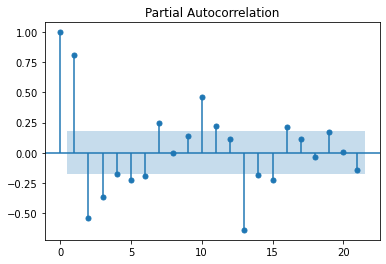

In [7]:
#PACF
pacf= plot_pacf(df)


In [8]:
#slpitting data for training and testing
train_end = datetime(2018,12,1)
test_end = datetime(2020,1,1)
train_data = df[:train_end]
test_data = df[train_end + timedelta(days=1):test_end]


In [9]:
#define model
model = ARMA(train_data, order=(13,0))


/Users/ln/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [10]:
#fit the model
start = time()
model_fit = model.fit()
end = time()
print('Model Fitting Time:', end - start)


Model Fitting Time: 21.463426113128662


/Users/ln/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [11]:
#summary of the model
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:              IPN31152N   No. Observations:                  108
Model:                    ARMA(13, 0)   Log Likelihood                -309.144
Method:                       css-mle   S.D. of innovations              3.919
Date:                Mon, 22 Nov 2021   AIC                            648.287
Time:                        13:41:23   BIC                            688.519
Sample:                    01-01-2010   HQIC                           664.600
                         - 12-01-2018                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              103.8105      1.430     72.615      0.000     101.009     106.612
ar.L1.IPN31152N      0.8835      0.073     12.066      0.000       0.740       1.027
ar.L2.IPN31152N      0.0287 

In [12]:
#get prediction start and end dates
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]



In [18]:
pred_start_date

Timestamp('2019-01-01 00:00:00', freq='MS')

In [17]:
#Prediction data
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)
residuals = test_data - predictions


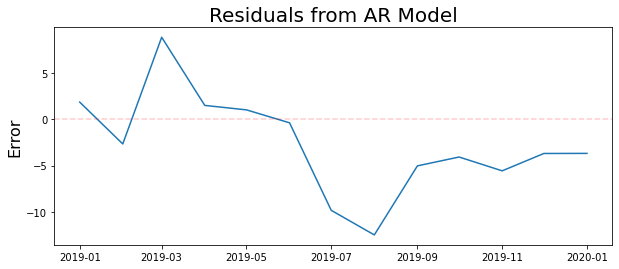

In [14]:
#plot of residual
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals from AR Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)


Text(0, 0.5, 'Sales')

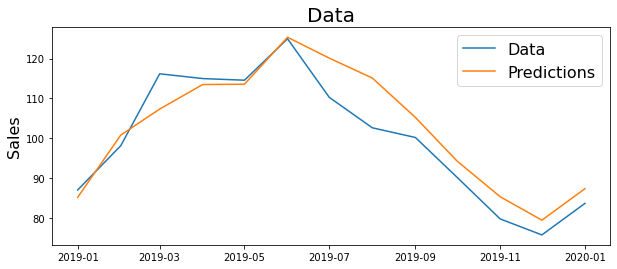

In [15]:
#Plot of prediction
plt.figure(figsize=(10,4))
plt.plot(test_data)
plt.plot(predictions)
plt.legend(('Data', 'Predictions'), fontsize=16)
plt.title('Data', fontsize=20)
plt.ylabel('Sales', fontsize=16)

In [16]:
#Root Mean Squared Error
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 5.855664966887893
